In [1]:
# Run this cell to mount your Google Drive.

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Imports

In [1]:
# path
pth = '/content/drive/MyDrive/Colab Notebooks/Thesis'

%cd /content/drive/My Drive/Colab Notebooks/Thesis/SupervisedLearning

from train import *
from visualize_data import *
from utils import *

%cd /content/drive/My Drive/Colab Notebooks/Thesis

/content/drive/My Drive/Colab Notebooks/Thesis/SupervisedLearning
/content/drive/My Drive/Colab Notebooks/Thesis


# State-Action Pair Guideline

Specify the desired state-action pair:

i.e. Before Pickup, Before Discard: Draw (bpbd_draw)

## Model Name Guideline

Specify the following parameters:

- **Data Selection**:
 - **`state-action pair`**
   - possible state-action pairs
```r
state_action_pair = {'all': 'all', # all actions
                    'bpbd': 'draw', # actions 2/3 
                    'apbd': ['discard', 'knock'], # actions 6-57, 58-109
                    'apad': 'knock_bin'}
```
 - **`model_name`**
   - name of the model based on **pruned states** and **chosen action**
 - **`numGames`**
   - Number of games used to train model
$$numGames \in [2000, 6000, 8000]$$

 - **`pruneStatesList`**
   - which states to omit when training model 
 ```r
 pruneStatesList is a list, {'currHand','topCard','deadCard','oppCard','unknownCard'}
 ```
 - **`actionChoice`**
   - which specific action to train model 
```r
actionChoice is one of {'all','draw','discard','knock'}
```
 - **`balance`** (T/F, **`default = False`**)
   - balance data by smallest class

--- 

- **Model Parameters**:

| Parameter         | Type            |Default|
| ----------------- |:---------------:| -----:|
| **batch_size**    | int             | 1000  |
| **learning_rate** | float           | 0.001 |
| **epoch**         | int             | 100   |
| **pre_train**     | bool (T/F)      | False |
| **model_PT**      | str (model/path)| null  |
| **device**        | str (cpu/cuda)  | cpu   |

# All

## all_states_all_actions

### Parameters

In [3]:
# state_action pair
state = 'all'
action = 'all'

# model name
model_name = 'all_states_all_actions'

# Number of Games
numGames = 8000

# prunable states
# {'currHand','topCard','deadCard','oppCard','unknownCard'} or blank if None
pruneStatesList = []

# choosable actions
# {'all','draw_pickup','discard','knock','knock_bin'}
actionChoice = 'all'

# Balance classes
balance = False

# Training parameters
batch_size = 1000
lr = 0.001
epochs = 100

# Pretrain model
pre_train = False
model_PT = ''

# device for model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Create Directories

In [4]:
data_pth, model_pth, plot_pth = create_dir(pth, state, action, model_name)

### Load, Prune, and Split Training Data

loading 8000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/all/all


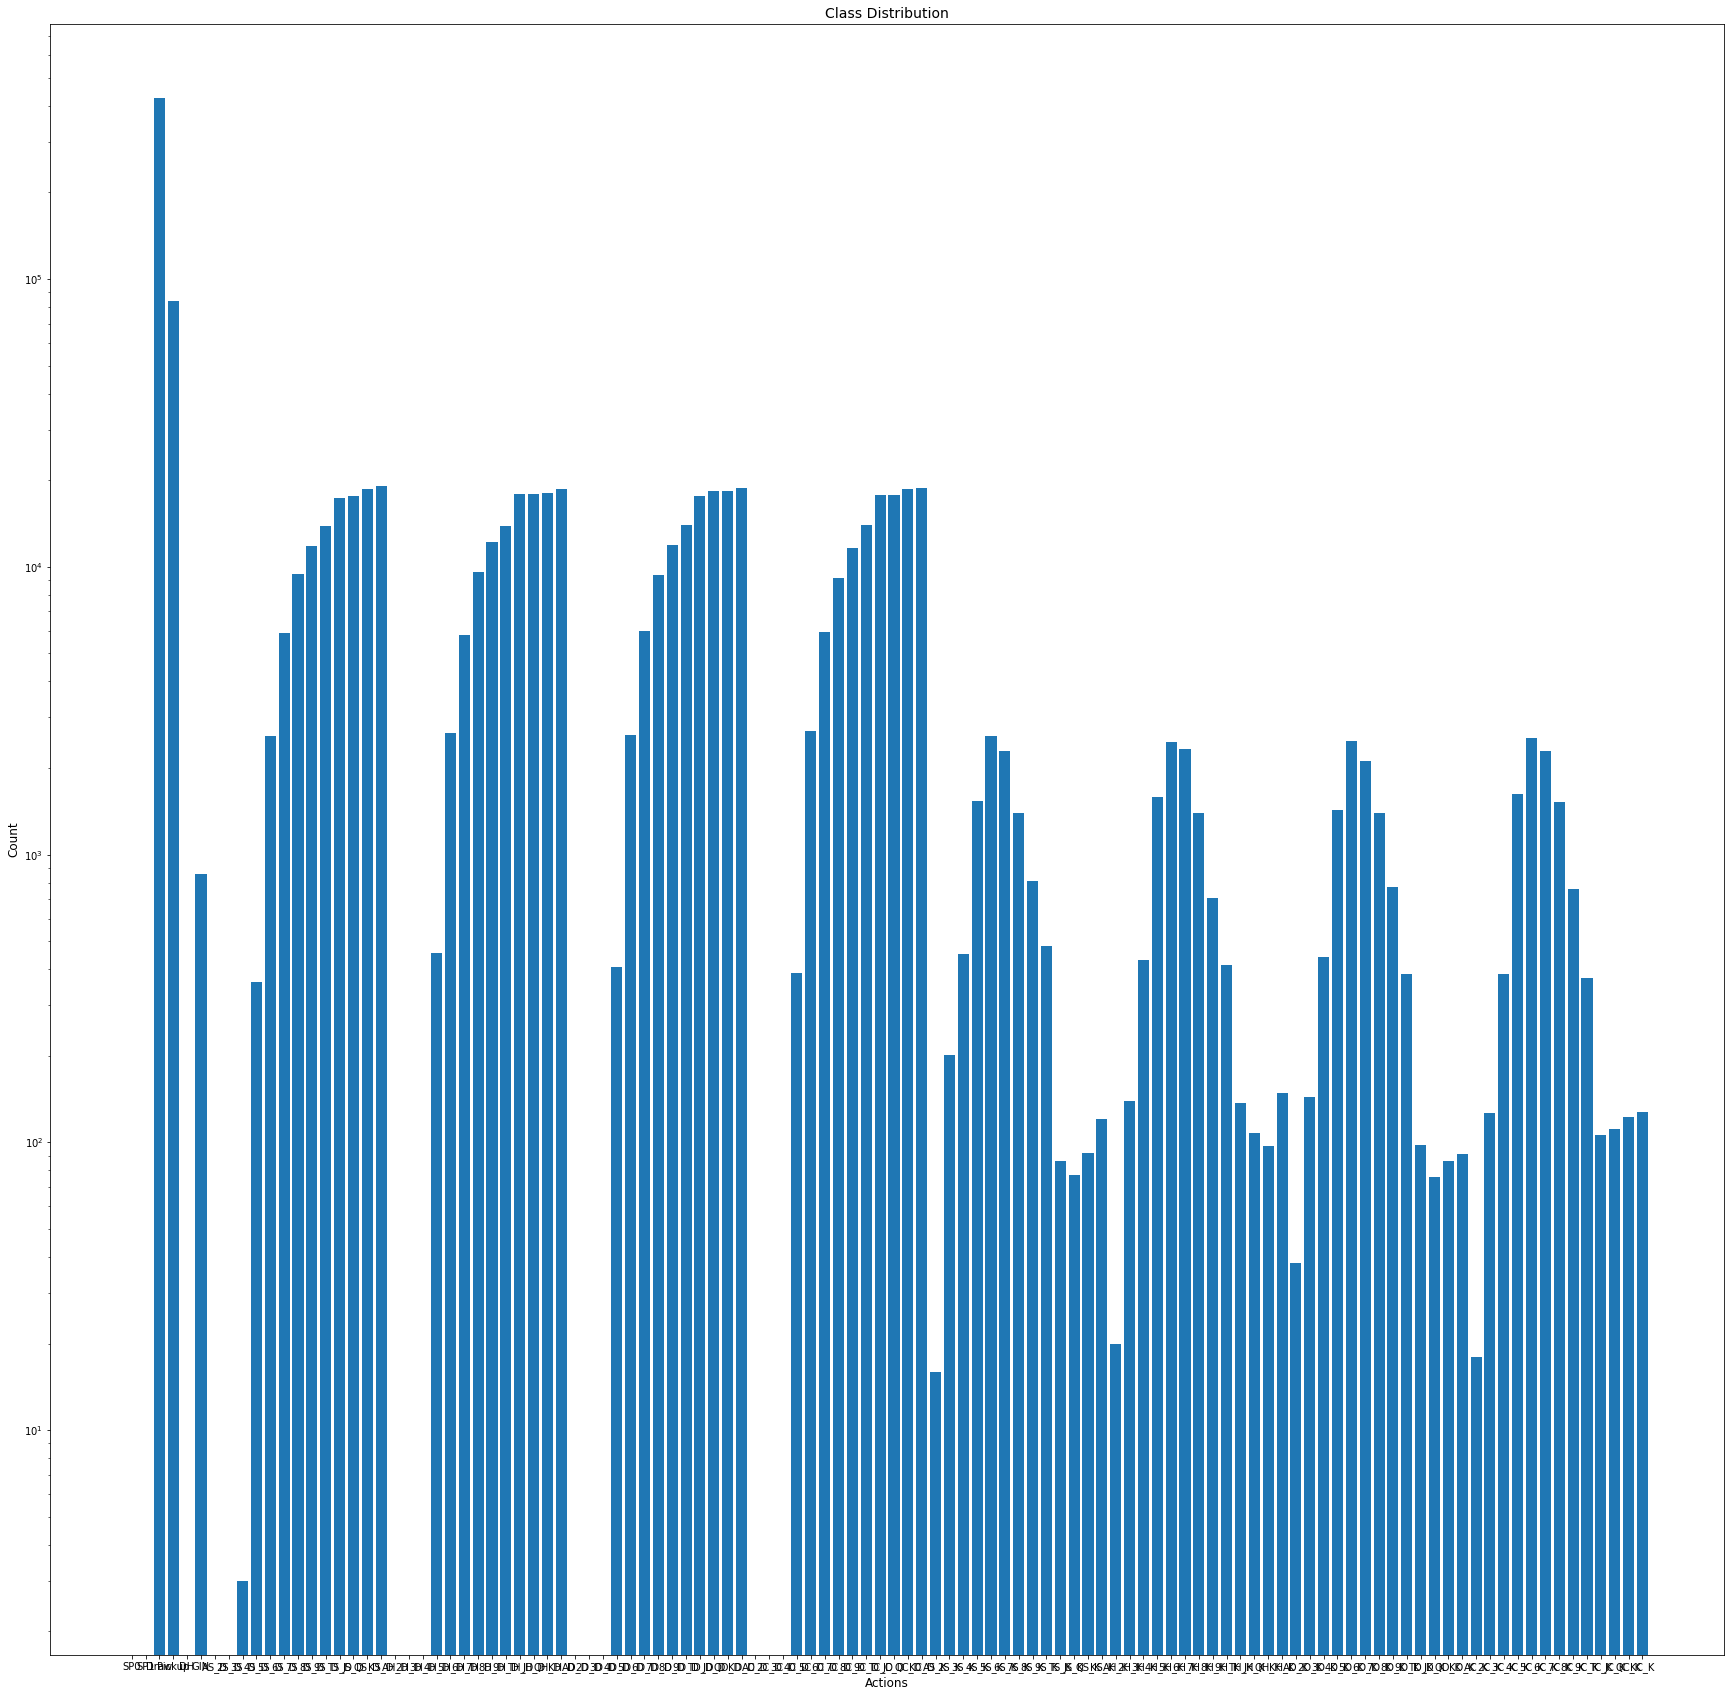

In [5]:
train_loader, val_loader, classes = load_train_data(data_pth, plot_pth,
                                                    numGames, batch_size, 
                                                    state, action, 
                                                    pruneStatesList, actionChoice, 
                                                    balance, visualize=True)

### Train Model

Epoch: 1 | Train Loss: 0.00849131 | Train acc: 0.416059
              Val Loss: 0.00685781 |   Val acc: 0.416195
Epoch: 2 | Train Loss: 0.00604354 | Train acc: 0.418370
              Val Loss: 0.00570232 |   Val acc: 0.416185
Epoch: 3 | Train Loss: 0.00560945 | Train acc: 0.451380
              Val Loss: 0.00554241 |   Val acc: 0.525642
Epoch: 4 | Train Loss: 0.00512490 | Train acc: 0.585490
              Val Loss: 0.00465198 |   Val acc: 0.609873
Epoch: 5 | Train Loss: 0.00439850 | Train acc: 0.636414
              Val Loss: 0.00426686 |   Val acc: 0.645875
Epoch: 6 | Train Loss: 0.00410016 | Train acc: 0.665016
              Val Loss: 0.00399693 |   Val acc: 0.676669
Epoch: 7 | Train Loss: 0.00388447 | Train acc: 0.686304
              Val Loss: 0.00379855 |   Val acc: 0.696301
Epoch: 8 | Train Loss: 0.00370947 | Train acc: 0.704393
              Val Loss: 0.00365071 |   Val acc: 0.710275
Epoch: 9 | Train Loss: 0.00355551 | Train acc: 0.715617
              Val Loss: 0.00351131 |   V

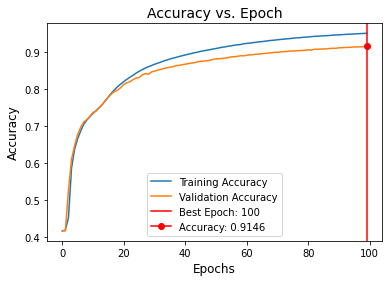

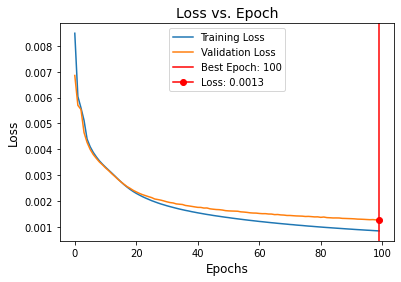

In [6]:
model, model_acc, model_loss = train(train_loader, val_loader, plot_pth, batch_size, lr, epochs, verbose=True, pre_train=pre_train, model_PT=model_PT, device=device)
torch.save(model, '{}/model.pt'.format(model_pth))
torch.save(model_acc, '{}/model_acc.pt'.format(model_pth))
torch.save(model_loss, '{}/model_loss.pt'.format(model_pth))

#### Confusion Matrix

##### Load Models

In [7]:
model = torch.load('{}/model.pt'.format(model_pth), map_location=device)
model_acc = torch.load('{}/model_acc.pt'.format(model_pth), map_location=device)
model_loss = torch.load('{}/model_loss.pt'.format(model_pth), map_location=device)

##### Train Set

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, train_loader, device, numGames=currGames)

##### Validation Set

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, val_loader, device, numGames=currGames, mode='val')

##### Test Set (6k)

In [ ]:
currGames = 6000
test_loader_6k, classes = load_test_data(data_pth, currGames, state, action,
                                         pruneStatesList, actionChoice)
plot_cm(plot_pth, classes, model, test_loader_6k, device, numGames=currGames)

##### Test Set (2k)

Test on all three models generated:

In [8]:
currGames = 2000
test_loader_2k, classes = load_test_data(data_pth, currGames, state, action,
                                         pruneStatesList, actionChoice)

loading 2000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/all/all


###### all epoch

In [9]:
plot_cm(plot_pth, classes, model, test_loader_2k, device, numGames=currGames)

Accuracy: 94.05
Normalized confusion matrix
Confusion matrix, without normalization


###### max validation accuracy

In [10]:
plot_cm(plot_pth, classes, model_acc, test_loader_2k, device, numGames=currGames, mode='acc')

Accuracy: 94.05
Normalized confusion matrix
Confusion matrix, without normalization


###### min validation loss

In [11]:
plot_cm(plot_pth, classes, model_loss, test_loader_2k, device, numGames=currGames, mode='loss')

Accuracy: 94.05
Normalized confusion matrix
Confusion matrix, without normalization


## all_states_all_actions_PT

### Parameters

In [2]:
# state_action pair
state = 'all'
action = 'all'

# model name
model_name = 'all_states_all_actions_PT'

# Number of Games
numGames = 8000

# prunable states
# {'currHand','topCard','deadCard','oppCard','unknownCard'} or blank if None
pruneStatesList = []

# choosable actions
# {'all','draw_pickup','discard','knock','knock_bin'}
actionChoice = 'all'

# Balance classes
balance = False

# Training parameters
batch_size = 1000
lr = 0.001
epochs = 100

# Pretrain model
pre_train = True
model_PT = '/content/drive/MyDrive/Colab Notebooks/Thesis/models/apbd/knock/all_states_all_actions/model.pt'

# device for model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Create Directories

In [3]:
data_pth, model_pth, plot_pth = create_dir(pth, state, action, model_name)

### Load, Prune, and Split Training Data

loading 8000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/all/all


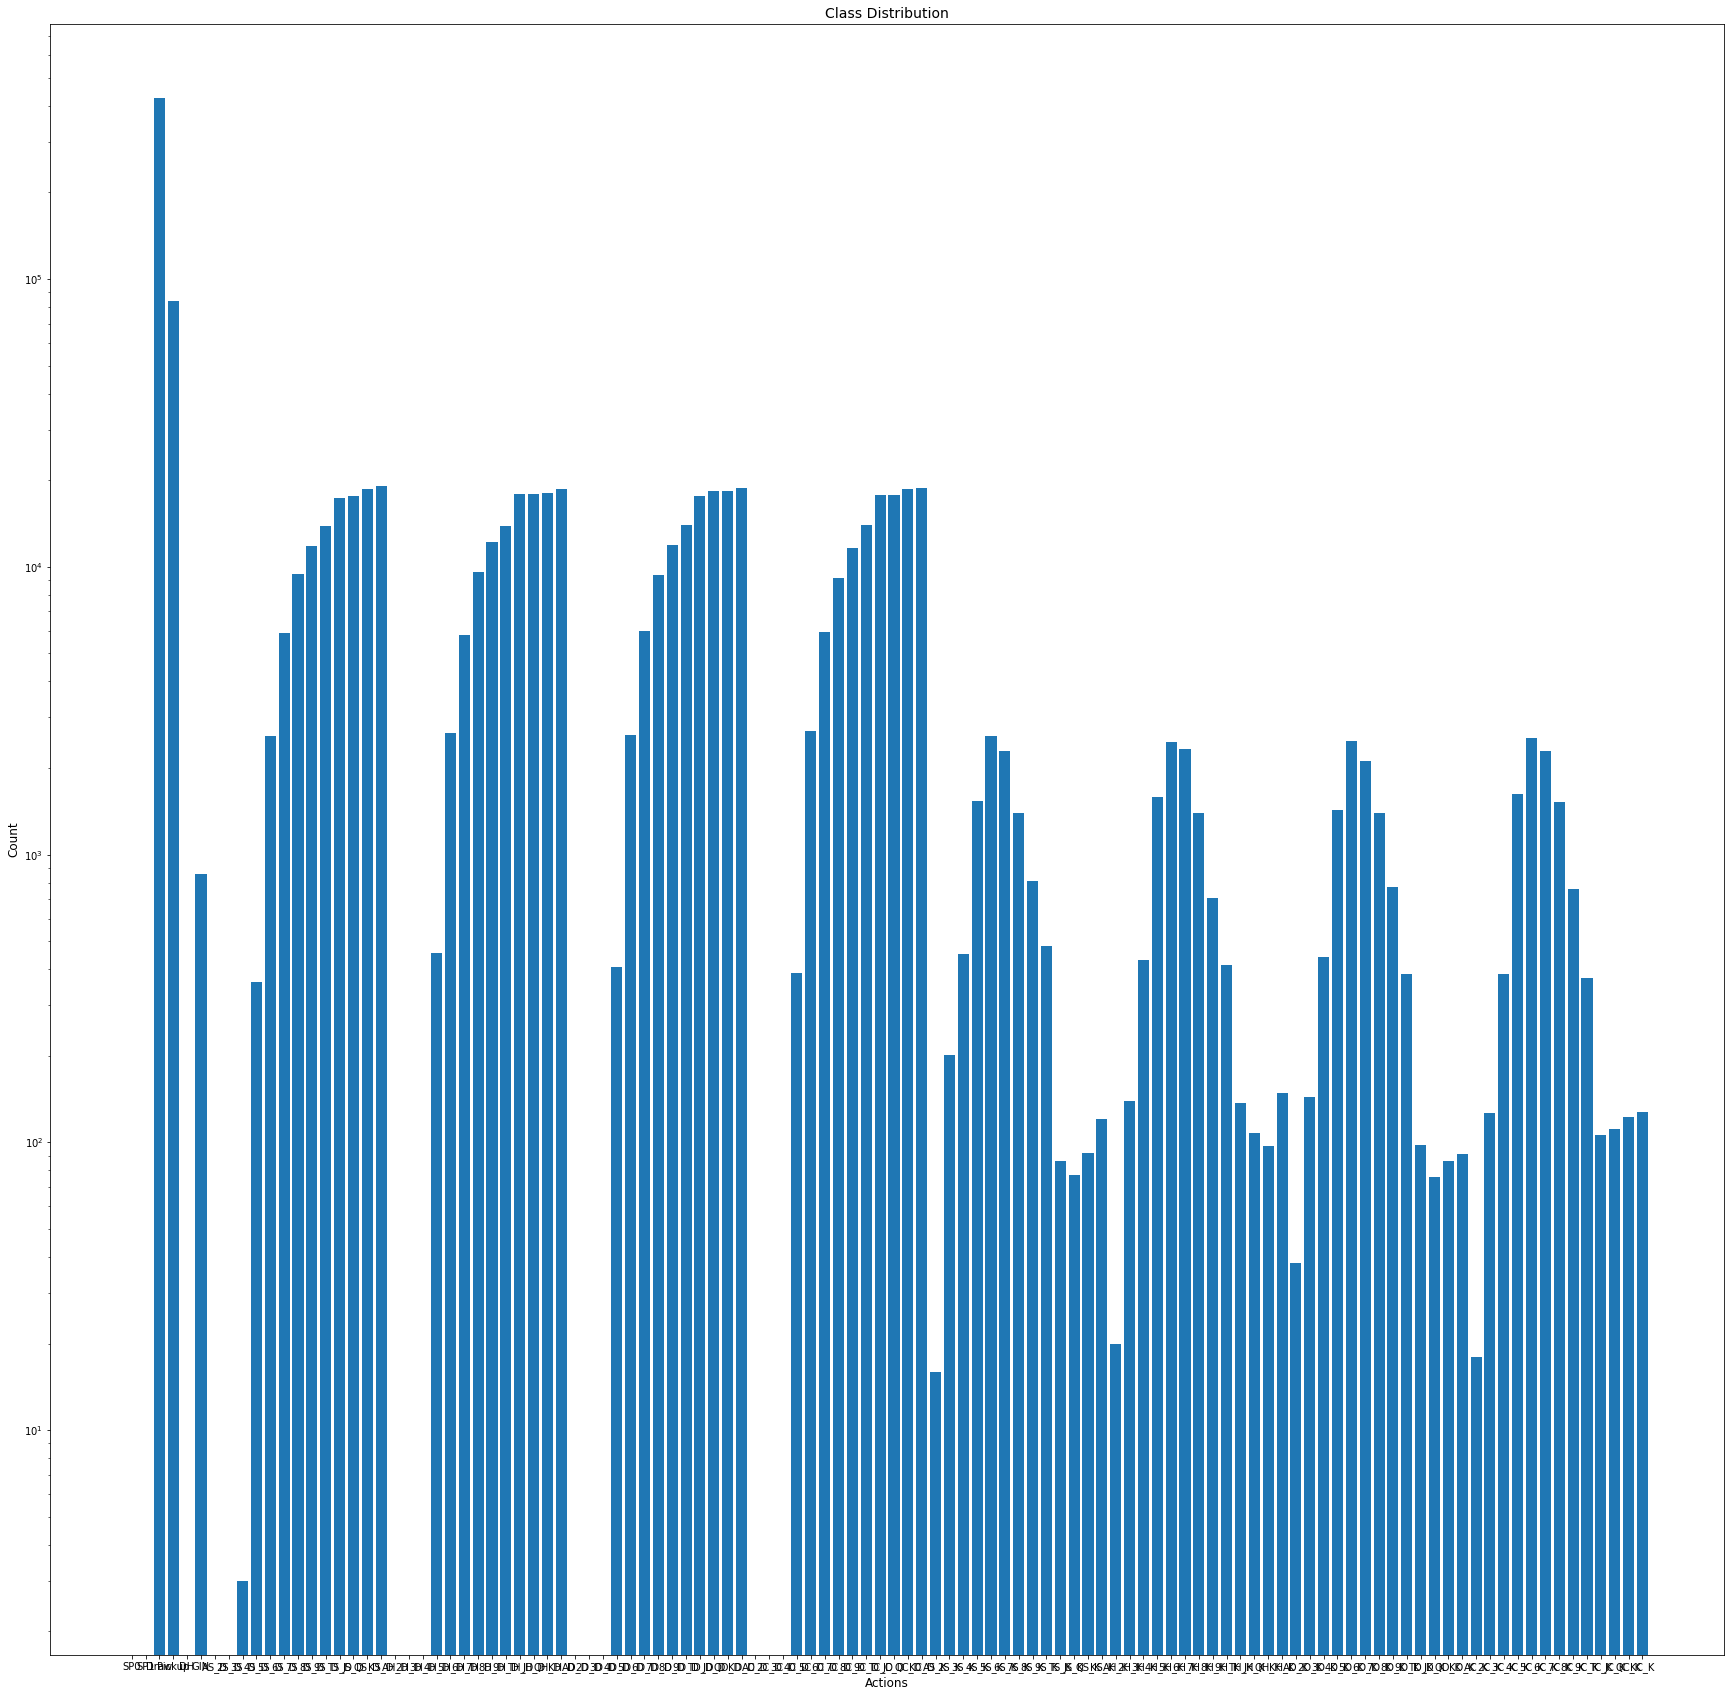

In [4]:
train_loader, val_loader, classes = load_train_data(data_pth, plot_pth,
                                                    numGames, batch_size, 
                                                    state, action, 
                                                    pruneStatesList, actionChoice, 
                                                    balance, visualize=True)

### Train Model

Epoch: 1 | Train Loss: 0.00881319 | Train acc: 0.414795
              Val Loss: 0.00723972 |   Val acc: 0.416195
Epoch: 2 | Train Loss: 0.00680622 | Train acc: 0.419581
              Val Loss: 0.00616067 |   Val acc: 0.423638
Epoch: 3 | Train Loss: 0.00543155 | Train acc: 0.536112
              Val Loss: 0.00486426 |   Val acc: 0.642686
Epoch: 4 | Train Loss: 0.00447382 | Train acc: 0.674783
              Val Loss: 0.00422472 |   Val acc: 0.691247
Epoch: 5 | Train Loss: 0.00402179 | Train acc: 0.702497
              Val Loss: 0.00391110 |   Val acc: 0.710210
Epoch: 6 | Train Loss: 0.00376881 | Train acc: 0.719210
              Val Loss: 0.00370615 |   Val acc: 0.722411
Epoch: 7 | Train Loss: 0.00357366 | Train acc: 0.732427
              Val Loss: 0.00355184 |   Val acc: 0.733430
Epoch: 8 | Train Loss: 0.00339950 | Train acc: 0.745198
              Val Loss: 0.00337937 |   Val acc: 0.744396
Epoch: 9 | Train Loss: 0.00323262 | Train acc: 0.757905
              Val Loss: 0.00323864 |   V

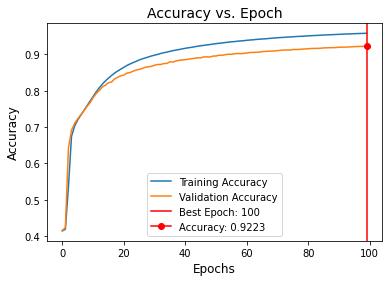

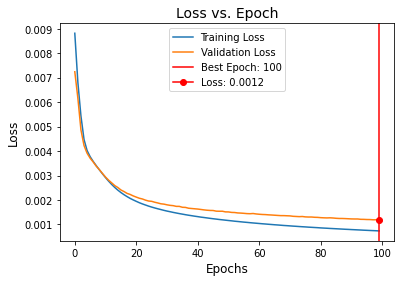

In [5]:
model, model_acc, model_loss = train(train_loader, val_loader, plot_pth, batch_size, lr, epochs, verbose=True, pre_train=pre_train, model_PT=model_PT, device=device)
torch.save(model, '{}/model.pt'.format(model_pth))
torch.save(model_acc, '{}/model_acc.pt'.format(model_pth))
torch.save(model_loss, '{}/model_loss.pt'.format(model_pth))

#### Confusion Matrix

##### Load Models

In [6]:
model = torch.load('{}/model.pt'.format(model_pth), map_location=device)
model_acc = torch.load('{}/model_acc.pt'.format(model_pth), map_location=device)
model_loss = torch.load('{}/model_loss.pt'.format(model_pth), map_location=device)

##### Train Set

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, train_loader, device, numGames=currGames)

##### Validation Set

In [ ]:
currGames = 8000
plot_cm(plot_pth, classes, model, val_loader, device, numGames=currGames, mode='val')

##### Test Set (6k)

In [ ]:
currGames = 6000
test_loader_6k, classes = load_test_data(data_pth, currGames, state, action,
                                         pruneStatesList, actionChoice)
plot_cm(plot_pth, classes, model, test_loader_6k, device, numGames=currGames)

##### Test Set (2k)

Test on all three models generated:

In [7]:
currGames = 2000
test_loader_2k, classes = load_test_data(data_pth, currGames, state, action,
                                         pruneStatesList, actionChoice)

loading 2000 games dataset from /content/drive/MyDrive/Colab Notebooks/Thesis/data/all/all


###### all epoch

In [8]:
plot_cm(plot_pth, classes, model, test_loader_2k, device, numGames=currGames)

Accuracy: 94.80
Normalized confusion matrix
Confusion matrix, without normalization


###### max validation accuracy

In [9]:
plot_cm(plot_pth, classes, model_acc, test_loader_2k, device, numGames=currGames, mode='acc')

Accuracy: 94.80
Normalized confusion matrix
Confusion matrix, without normalization


###### min validation loss

In [10]:
plot_cm(plot_pth, classes, model_loss, test_loader_2k, device, numGames=currGames, mode='loss')

Accuracy: 94.80
Normalized confusion matrix
Confusion matrix, without normalization
